In [17]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset from sklearn
diabetes = load_diabetes()

# Features and target
X = diabetes.data  # Feature matrix (10 features)
y = diabetes.target  # Target variable (disease progression measure)


**Split the dataset into training and test sets**

In [18]:
# Split the dataset into 80% training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Standardize the data**

In [19]:
# Standardize the feature data (mean = 0, variance = 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Model Training**

In [20]:
ridge_reg = Ridge(alpha=1.0)  # Regularization strength (alpha)
ridge_reg.fit(X_train_scaled, y_train)


Ridge()

**Prediction on test set**

In [21]:
y_pred = ridge_reg.predict(X_test_scaled)
y_pred

array([139.86277405, 179.9582406 , 135.71687469, 292.11578228,
       123.18931464,  92.63420961, 257.85540931, 182.98437571,
        88.57110276, 109.34130188,  94.44005222, 166.79559349,
        56.34471823, 206.28537014,  99.83697447, 131.14352119,
       220.13422127, 249.66324991, 196.24491272, 217.48836765,
       207.27026897,  88.62662434,  71.00067256, 188.77371926,
       155.27179344, 160.11509377, 188.68359243, 179.4462606 ,
        48.58194512, 109.46862532, 176.30864771,  87.81175183,
       132.57482949, 183.48671555, 173.64887924, 190.57967229,
       123.89852066, 119.22466026, 147.3190418 ,  59.64849436,
        72.53769889, 107.79400092, 164.47289681, 153.51402972,
       172.19580463,  62.65517635,  73.5923177 , 112.86223345,
        53.52690481, 165.85907297, 153.72729198,  63.69903686,
       106.37934882, 108.94605495, 174.12346145, 156.07183591,
        94.49282843, 209.90083637, 119.67133314,  75.31549064,
       187.08319266, 205.38638319, 140.93273277, 105.55

**Evaluate the model**

In [22]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-squared score
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 2892.01
R-squared: 0.45


**Model Coefficients**

In [23]:
# Coefficients of the Ridge Regression model
print(f'Ridge Coefficients: {ridge_reg.coef_}')


Ridge Coefficients: [  1.80734179 -11.44818951  25.73269892  16.73429974 -34.67195409
  17.05307485   3.36991411  11.76426044  31.3783838    2.45813922]


**Graphical analysis - True vs Predicted values**

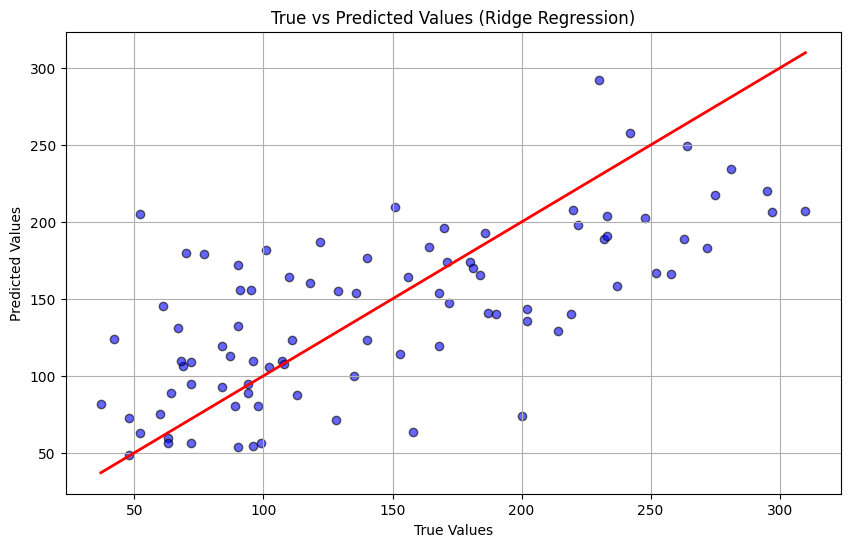

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Ridge Regression)')
plt.grid(True)
plt.show()


**Graphical analysis - Residual plot**

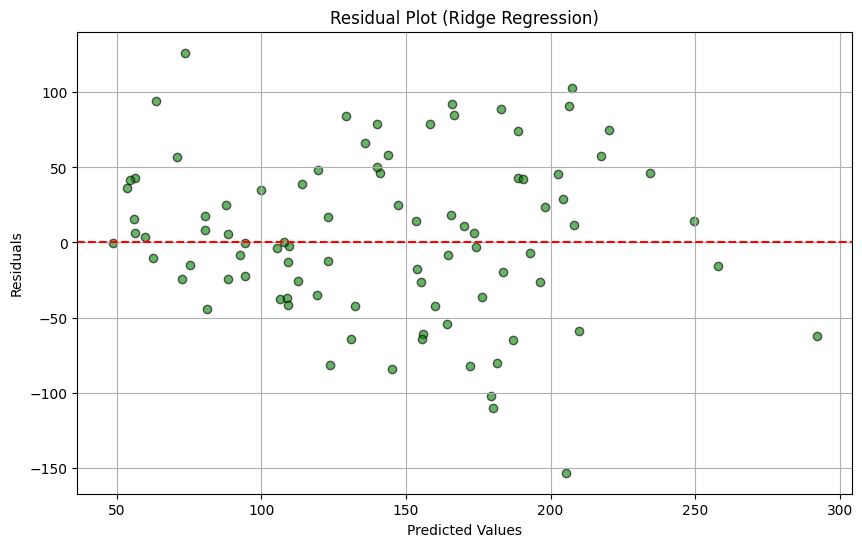

In [25]:
residuals = y_test - y_pred  # Calculate residuals (errors)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', edgecolor='k', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Ridge Regression)')
plt.grid(True)
plt.show()
